### 正準系の判定方法の追加

追加したコードフラグメントの辺ラベルが全て同じ辺ラベル（０）は除く
→そのグラフは正準系である
##### 例：辺ラベルが1と2の2種類の場合
[1,1,1]  
[2,2,2]  
[2,2,2,2,2,2,2]  
など  

コードフラグメントを新たに追加するときに、辺ラベルが全て同じが計算しておく  
final byte vLabel;  
final byte[] eLabels;  
final boolean isConnected;  
<font color="red">final boolean allElabelSame;</font>  

allElabelSameを呼び出すだけで、正準判定が可能

### 並列処理の実装

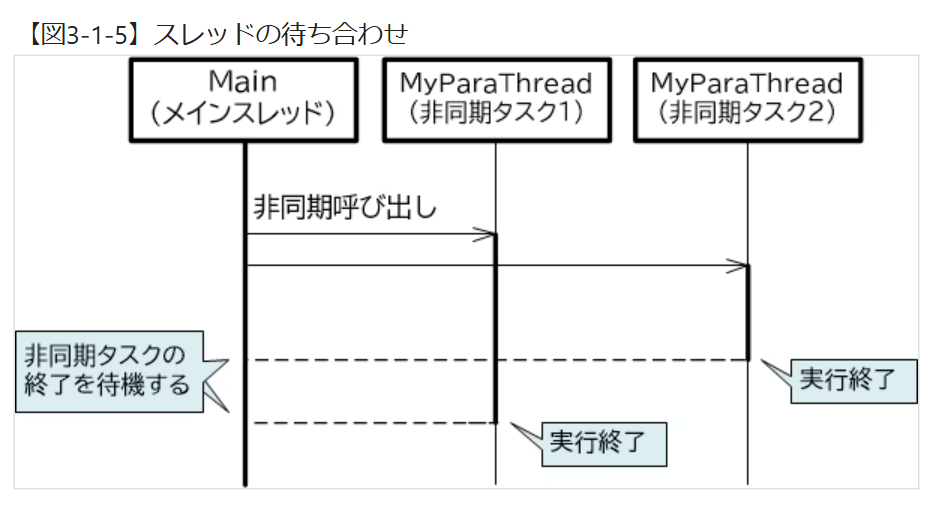

tasks.add(CompletableFuture.supplyAsync(() -> {  
　　　return enumarateWithAcGMParallel(executorService, childrenOfM1, nowFragments);  
}, executorService).thenCompose(future -> future));  


return CompletableFuture.allOf(tasks.toArray(new CompletableFuture[0]));

1. tasks.add(...)
    * List<CompletableFuture<T>> で、非同期タスクを管理  
2. CompletableFuture.supplyAsync(() -> { ... }, executorService)  
    - supplyAsync メソッドは非同期タスクを開始。非同期に CompletableFuture を返す  
    - executorService はスレッドプールで、この処理が指定のスレッドプールで実行されることを指定  
3. thenComposeAsync(future -> future)  
    - thenComposeAsync メソッドは、1つの CompletableFuture が終了した後で新しい CompletableFuture を実行したい場合に使用  
    - numarateWithAcGMParallel が CompletableFuture を返すため、thenCompose を用いることで、結果の非同期処理をさらに連結し、処理の完了を待機しながら次の処理に進むようにしている。
4. CompletableFuture.allOf(...)  
    - 複数の CompletableFuture の完了を待つためのメソッド  
    - すべてのタスクが完了すると完了状態